Q.No-01    Explain the assumptions required to use ANOVA and provide examples of violations that could impact the validity of the results.

Ans :-

**`Analysis of Variance` (ANOVA)** is a statistical technique used to compare means among three or more groups. To use **ANOVA** effectively and interpret its results accurately, certain assumptions must be met. Violations of these assumptions can compromise the validity of the results.

**The key assumptions for using `ANOVA` :-**

1. **`Independence` -** 

    Observations within each group are assumed to be independent of each other. This means that the values of one observation do not influence the values of another observation in the same group.

2. **`Normality` -** 

    The distribution of the residuals (the differences between the observed values and the group means) should be approximately normally distributed within each group. Normality assumption is more critical when the sample sizes are small, as larger sample sizes tend to be more robust to violations of normality.

3. **`Homogeneity of Variance` (Homoscedasticity) -** 

The variance of the residuals should be roughly the same across all groups. This means that the spread of data points around the group means should be consistent across groups.

**`Examples of Violations` for each assumption :-**

**1. `Independence` -**

Violations of independence can occur when there is a correlation between observations within a group. For instance, in a study measuring the academic performance of students in different schools, if students within the same school are influenced by similar external factors (e.g., teaching style), their grades may not be truly independent.

Number of School = 5
Number of Students per School = 30

Top 5 Sample of Data Set :-


,School,Performance
0,0,60.117402
1,0,74.425225
2,0,74.026616
3,0,81.341356
4,0,65.427422


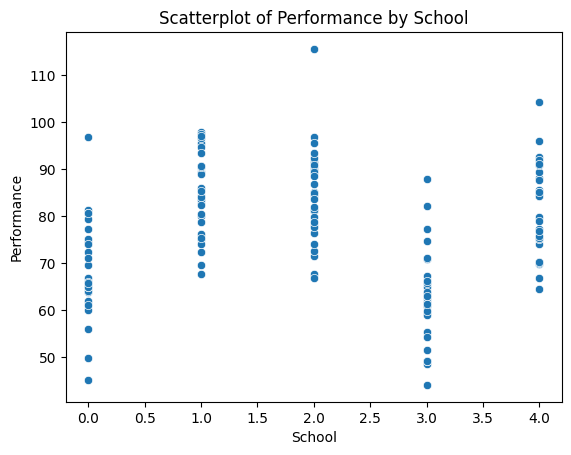

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)

# Simulating data with correlation within schools
num_schools = 5
print(f"Number of School = {num_schools}")
students_per_school = 30
print(f"Number of Students per School = {students_per_school}")



data = []

for school in range(num_schools):
    mean_performance = np.random.uniform(60, 90)
    school_data = np.random.normal(mean_performance, 10, students_per_school)
    data.extend(school_data)

school_labels = np.repeat(np.arange(num_schools), students_per_school)
df_School = pd.DataFrame({'School': school_labels, 'Performance': data})
print("\nTop 5 Sample of Data Set :-" )
display(df_School.head())

# Creating a scatterplot to visualize correlation within schools
sns.scatterplot(data=df_School, x='School', y='Performance')
plt.title('Scatterplot of Performance by School')
plt.xlabel('School')
plt.ylabel('Performance')
plt.show()



**2. `Normality` -**

If the residuals within groups are not normally distributed, it can lead to inaccurate p-values and confidence intervals. For example, if you're comparing the effectiveness of a drug in treating a medical condition across different age groups, but the residuals in each age group are heavily skewed, the ANOVA results may not be reliable.

Number of Age Groups = 4
Samples per group = 30

Top 5 Sample of Data Set :-


,Age Group,Effectiveness
0,1,4.648940
1,1,7.510505
2,1,7.430783
3,1,8.893731
4,1,5.710944


ANOVA p-value: 7.332671175414569e-14


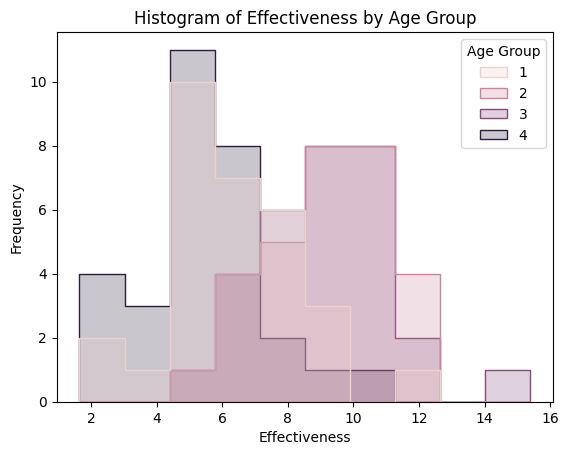

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, f_oneway

np.random.seed(42)

# Simulating data with skewed residuals within age groups
num_age_groups = 4
print(f"Number of Age Groups = {num_age_groups}")
samples_per_group = 30
print(f"Samples per group = {samples_per_group}")


data = []

for age_group in range(1, num_age_groups + 1):
    mean_effect = np.random.uniform(5, 10)
    age_data = np.random.normal(mean_effect, 2, samples_per_group)
    data.extend(age_data)

age_group_labels = np.repeat(np.arange(1, num_age_groups + 1), samples_per_group)
df_Age = pd.DataFrame({'Age Group': age_group_labels, 'Effectiveness': data})
print("\nTop 5 Sample of Data Set :-" )
display(df_Age.head())

# Performing ANOVA analysis
anova_result = f_oneway(*[df_Age[df_Age['Age Group'] == i]['Effectiveness'] for i in range(1, num_age_groups + 1)])
print("ANOVA p-value:", anova_result.pvalue)

# Creating a histogram to visualize skewed residuals within age groups
sns.histplot(data=df_Age, x='Effectiveness', hue='Age Group', element='step', common_norm=False)
plt.title('Histogram of Effectiveness by Age Group')
plt.xlabel('Effectiveness')
plt.ylabel('Frequency')
plt.show()

**3. `Homogeneity of Variance` -**

When the variability of the residuals differs significantly across groups, the assumption of homogeneity of variance is violated. For instance, in a study comparing the performance of various car models on different road surfaces, if the variability in speed measurements is much larger on one type of road surface compared to others, the assumption of homogeneity of variance would be compromised.

Number of Road Surfaces = 3
Samples per surface = 30

Top 5 Sample of Data Set :-


,Surface,Speed
0,1,48.193944
1,1,63.386136
2,1,62.962889
3,1,70.729754
4,1,53.832177


ANOVA p-value: 0.06838016164696417


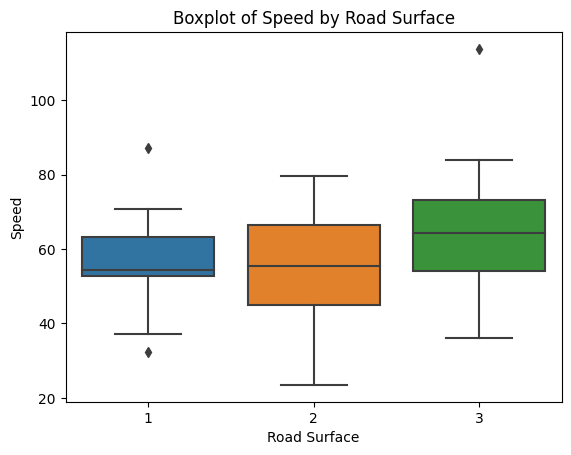

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

np.random.seed(42)

# Simulating data with varying variability (heteroscedasticity)
num_road_surfaces = 3
print(f"Number of Road Surfaces = {num_road_surfaces}")
samples_per_surface = 30
print(f"Samples per surface = {samples_per_surface}")

data = []

for surface in range(num_road_surfaces):
    variability_factor = np.random.uniform(0.5, 2.0)
    surface_data = np.random.normal(60, 10 * variability_factor, samples_per_surface)
    data.extend(surface_data)

surface_labels = np.repeat(np.arange(1, num_road_surfaces + 1), samples_per_surface)
df_Seed = pd.DataFrame({'Surface': surface_labels, 'Speed': data})
print("\nTop 5 Sample of Data Set :-")
display(df_Seed.head())

# Performing ANOVA analysis
anova_result = f_oneway(*[df_Seed[df_Seed['Surface'] == i]['Speed'] for i in range(1, num_road_surfaces + 1)])
print("ANOVA p-value:", anova_result.pvalue)

# Creating boxplots to visualize heteroscedasticity
sns.boxplot(data=df_Seed, x='Surface', y='Speed')
plt.title('Boxplot of Speed by Road Surface')
plt.xlabel('Road Surface')
plt.ylabel('Speed')
plt.show()

--------------------------------------------------------------------------------------------------------------------

Q.No-02    What are the three types of ANOVA, and in what situations would each be used?

Ans :-

**ANOVA `(Analysis of Variance)`** is a statistical technique used to analyze the differences between group means in a study.

**There are three main types of ANOVA: `One-way ANOVA`, `Two-way ANOVA`, and `Repeated measures ANOVA`.**

Each type is used in different situations depending on the experimental design and the nature of the data.

**1. `One-Way ANOVA` :-**

   This type of ANOVA is used when you have one independent variable (factor) with three or more levels or groups, and you want to determine whether there are significant differences in the means of the dependent variable across these groups. It's suitable for situations where you're comparing the means of different groups to see if they're statistically significantly different.

**Example situation:** 

A pharmaceutical company is testing the effectiveness of three different doses of a new drug. They want to know if there's a significant difference in the mean recovery time among the three dose groups.

In [46]:
import numpy as np
from scipy.stats import f_oneway

# Create recovery time data for each dose group
dose_1 = [10.2, 9.8, 11.5, 12.0, 10.6]
dose_2 = [8.5, 7.8, 9.5, 8.0, 9.3]
dose_3 = [6.5, 7.2, 6.8, 7.9, 7.0]


# Perform one-way ANOVA
anova_results = f_oneway(dose_1, dose_2, dose_3)

print("One-Way ANOVA Results :-")
print(f"\tF-statistic = {anova_results.statistic:.2f}")
print(f"\tp-value = {anova_results.pvalue}")

One-Way ANOVA Results :-
	F-statistic = 31.43
	p-value = 1.6955035017567814e-05


**2. `Two-Way ANOVA` :-**

   Two-way ANOVA is used when you have two independent variables, also known as factors, and you want to examine how their interactions influence the dependent variable. It helps you determine whether there are significant main effects of each factor and whether their interaction has an impact on the dependent variable.

**Example situation:**

A study is conducted to analyze the effects of both gender and different teaching methods on exam scores. Two-way ANOVA can determine if there are significant differences in scores due to gender, teaching methods, and if the interaction between gender and teaching methods is significant.

In [47]:
import pandas as pd
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Create a sample DataFrame
data = {
    'exam_scores': [85, 78, 92, 88, 95, 72, 80, 88, 90, 82, 75, 98],
    'gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'teaching_method': ['Method A', 'Method A', 'Method B', 'Method B', 'Method A', 'Method A', 'Method B', 'Method B', 'Method A', 'Method A', 'Method B', 'Method B']
}

df_Study = pd.DataFrame(data)
print("Top 5 Sample of Data Set :-")
display(df_Study.head())


# Overall ANOVA using scipy
gender_groups = [group['exam_scores'] for name, group in df_Study.groupby('gender')]
teaching_method_groups = [group['exam_scores'] for name, group in df_Study.groupby('teaching_method')]

anova_gender = f_oneway(*gender_groups)
anova_teaching_method = f_oneway(*teaching_method_groups)

print("Overall ANOVA (Gender) :-")
print(f"\tStatistic : {anova_gender.statistic}")
print(f"\tp-value:    {anova_gender.pvalue:.3f}")
print("\nOverall ANOVA (Teaching Method) :-")
print(f"\tStatistic : {anova_teaching_method.statistic}")
print(f"\tp-value:    {anova_teaching_method.pvalue:.3f}")

# Detailed ANOVA using statsmodels
model = ols('exam_scores ~ C(gender) + C(teaching_method) + C(gender):C(teaching_method)', data=df_Study).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("\nDetailed ANOVA Table :-")
display(anova_table)


Top 5 Sample of Data Set :-


,exam_scores,gender,teaching_method
0,85,Male,Method A
1,78,Female,Method A
2,92,Male,Method B
3,88,Female,Method B
4,95,Male,Method A


Overall ANOVA (Gender) :-
	Statistic : 0.14360313315926893
	p-value:    0.713

Overall ANOVA (Teaching Method) :-
	Statistic : 0.44099682384559
	p-value:    0.522

Detailed ANOVA Table :-


,sum_sq,df,F,PR(>F)
C(gender),10.083333,1.0,0.252083,0.629137
C(teaching_method),30.083333,1.0,0.752083,0.411074
C(gender):C(teaching_method),352.083333,1.0,8.802083,0.017958
Residual,320.000000,8.0,NaN,NaN


**3. `Repeated Measures ANOVA` :-**
   This type of ANOVA is used when you have repeated measurements on the same subjects or units, and you want to examine the effects of one or more independent variables on a dependent variable. It takes into account the correlated nature of the data and is used to analyze within-subjects designs.

**Example situation:** 

A psychologist is studying the effectiveness of three different therapies for reducing anxiety levels in the same group of participants. Repeated measures ANOVA would be used to analyze changes in anxiety scores over time within each therapy group.

In [48]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Create a sample DataFrame
data = {
    'participant_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'therapy_type': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'A'],
    'time_1': [15, 18, 20, 22, 16, 19, 25, 24, 21, 17],
    'time_2': [12, 14, 15, 18, 11, 14, 20, 19, 16, 13],
    'time_3': [10, 11, 12, 13, 9, 10, 15, 14, 11, 9]
}

df_Psychologist = pd.DataFrame(data)
print("Top 5 Sample of Data Set :-")
display(df_Psychologist.head())


# Reshape the DataFrame into a long format
df_long = pd.melt(df_Psychologist, id_vars=['participant_id', 'therapy_type'], value_vars=['time_1', 'time_2', 'time_3'], var_name='time', value_name='anxiety_score')

# Perform repeated measures ANOVA using statsmodels
model = ols('anxiety_score ~ C(therapy_type) + C(time) + C(therapy_type):C(time)', data=df_long).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("Repeated Measures ANOVA:")
display(anova_table)


Top 5 Sample of Data Set :-


,participant_id,therapy_type,time_1,time_2,time_3
0,1,A,15,12,10
1,2,B,18,14,11
2,3,C,20,15,12
3,4,A,22,18,13
4,5,B,16,11,9


Repeated Measures ANOVA:


,sum_sq,df,F,PR(>F)
C(therapy_type),2.227778,2.0,0.108170,0.897972
C(time),345.266667,2.0,16.764393,0.000045
C(therapy_type):C(time),1.622222,4.0,0.039383,0.996807
Residual,216.250000,21.0,NaN,NaN


**In Summary :-**
- **`One-Way` ANOVA** - Compares means across three or more independent groups or levels of a single factor.
- **`Two-Way` ANOVA** - Examines how two independent variables (factors) and their interactions influence a dependent variable.
- **`Repeated Measures` ANOVA** - Analyzes the effects of one or more independent variables in a design where measurements are taken repeatedly on the same subjects or units.


--------------------------------------------------------------------------------------------------------------------

Q.No-03    What is the partitioning of variance in ANOVA, and why is it important to understand this concept?

Ans :-

**`The partitioning of variance`** in **`Analysis of Variance` (ANOVA)** refers to the process of decomposing the total variability observed in a dataset into different sources of variability, often referred to as "sums of squares." ANOVA is a statistical technique used to compare means across different groups to determine if there are statistically significant differences among those groups. It's particularly useful when you have multiple groups and you want to determine if the observed differences in means are likely due to actual group differences or if they could be due to random chance.

The partitioning of variance occurs within the `scipy.stats.f_oneway` function. It calculates the sums of squares for between-groups variability and within-groups variability, and then computes the F-ratio by dividing the between-groups sums of squares by the within-groups sums of squares.

In [49]:
import numpy as np
from scipy import stats

# Simulated data: scores for each teaching method
method_a = np.array([85, 88, 90, 82, 91])
print("Simulated data: scores for teaching method A :-")
display(method_a)
method_b = np.array([78, 82, 80, 75, 85])
print("Simulated data: scores for teaching method B :-")
display(method_b)
method_c = np.array([92, 89, 87, 95, 88])
print("Simulated data: scores for teaching method C :-")
display(method_c)

# Stack the data to create a single dataset
data = np.hstack([method_a, method_b, method_c])
print("Stack the data to create a single dataset :- ")
display(data)

# Group labels for each data point
groups = np.array(['A'] * len(method_a) + ['B'] * len(method_b) + ['C'] * len(method_c))


# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(method_a, method_b, method_c)

print("Calculation :-")
print("\tF-statistic:", f_statistic)
print("\tP-value:", p_value)

# Interpret the results
alpha = 0.05

print("\nConclusion :-")
if p_value < alpha:
    print("\tReject the null hypothesis: \n\t\t\t\tThere are significant differences in the means.")
else:
    print("\tFail to reject the null hypothesis: \n\t\t\t\tNo significant differences in the means.")

Simulated data: scores for teaching method A :-


array([85, 88, 90, 82, 91])

Simulated data: scores for teaching method B :-


array([78, 82, 80, 75, 85])

Simulated data: scores for teaching method C :-


array([92, 89, 87, 95, 88])

Stack the data to create a single dataset :- 


array([85, 88, 90, 82, 91, 78, 82, 80, 75, 85, 92, 89, 87, 95, 88])

Calculation :-
	F-statistic: 10.596401028277638
	P-value: 0.0022326671369969978

Conclusion :-
	Reject the null hypothesis: 
				There are significant differences in the means.


    The partitioning of variance involves breaking down the total variance into several components :-

1. **`Total Variance` (Total Sums of Squares, SST) -** 

    This is the overall variability in the data across all groups. It represents the variability of individual data points from the overall mean of the entire dataset.

2. **`Between-Group Variance` (Between-Groups Sums of Squares, SSB) -** 

    This component captures the variability between the group means. It reflects the differences between the means of different groups and is a measure of the effect of the grouping variable.

3. **`Within-Group Variance` (Within-Groups Sums of Squares, SSW) -** 

    Also known as the "error variance," this component captures the variability within each group. It represents the variability of individual data points within a group around their group mean.

The rationale behind partitioning the variance in ANOVA is to compare the between-group variability to the within-group variability. If the between-group variability is significantly larger than the within-group variability, it suggests that the group means are different enough to conclude that the groups are not all coming from the same population.

The F-ratio, which is calculated as the ratio of the between-group variance to the within-group variance, is used to test the null hypothesis that all group means are equal. If the F-ratio is sufficiently large and exceeds a critical value based on the degrees of freedom, it indicates that there are significant differences among at least some of the group means.

    To Understanding the concept of partitioning of variance in ANOVA is important for several reasons :-

1. **`Interpretation` -** 

    It helps researchers understand how much of the total variability in the data is explained by group differences and how much is due to random fluctuations.

2. **`Hypothesis Testing` -** 

    ANOVA helps determine whether the observed group differences are statistically significant or if they could have occurred by chance.

3. **`Experimental Design` -** 

    It guides experimental design by helping researchers choose appropriate sample sizes and determine the number of groups required to detect significant differences.

4. **`Variable Importance` -** 

    In some cases, ANOVA can indicate which factors or variables contribute most to the observed differences.

5. **`Decision Making` -** 

    It provides a basis for making informed decisions about whether to reject or fail to reject the null hypothesis of equal group means.

In summary, the partitioning of variance in ANOVA is a fundamental concept that underlies the statistical technique, enabling researchers to make informed inferences about group differences based on systematic decomposition of variability.

--------------------------------------------------------------------------------------------------------------------

Q.No-04    How would you calculate the total sum of squares (SST), explained sum of squares (SSE), and residual sum of squares (SSR) in a one-way ANOVA using Python?

Ans :-

In [50]:
import numpy as np
import pandas as pd
from scipy import stats

School1_data = [23, 25, 27, 22, 20]
print(f"Data of Frist School = {School1_data}")
School2_data = [30, 32, 35, 31, 28]
print(f"Data of Second school = {School2_data} ")
School3_data = [18, 15, 20, 17, 16]
print(f"Data of Third school = {School3_data}")
# ... (more groups if needed)


print("\nDataFrame Table (Pandas DataFrame) :-")
# Create a pandas DataFrame
School_Data = {'Frist School': [23, 25, 27, 22, 20],
        'Second school': [30, 32, 35, 31, 28],
        'Third school':[18, 15, 20, 17, 16]}

School_df = pd.DataFrame(School_Data, index=['Class 1', 'Class 2', 'Class 3','Class 4','Class 5'])
display(School_df)


All_School_data = np.concatenate((School1_data, School2_data, School3_data))
print("Given DataFrame Table (Numpy Array) :-")
display(All_School_data)

print(f"Calculation :-")
overall_mean = np.mean(All_School_data)
print(f"\tMean of All School Data : {overall_mean:.2f}")
n_total = len(All_School_data)
print ("\tTotal Number Of Classes in all Schools: " , n_total)

deviations_total = All_School_data - overall_mean
print(f"\nDeviations from Mean for Each Class :-")
display(deviations_total)
SST = np.sum(deviations_total ** 2)
print(f"\tSum of Squares Total = {SST:.2f}")

group_means = [np.mean(School1_data), np.mean(School2_data), np.mean(School3_data)]
print(f"\tGroup Means = {group_means}")
deviations_groups = group_means - overall_mean
print(f"\nDeviation From Overall mean For each Group:- ")
display(deviations_groups)
SSE = np.sum(n_total * (deviations_groups ** 2))
print(f"\tSum of Square Errors = {SSE:.2f}")

SSR = SST - SSE
print(f"\tResidual Sum of Squares = {SSR}")

print(f"\tStudent's T-Score Ratio = {SSR/SST}")

f_statistic, p_value = stats.f_oneway(School1_data, School2_data, School3_data)
print(f"\tF Statistic Value = {f_statistic}")
print(f"\tp value = {p_value}")

print("\nResult :-")
print(f"\tSum of Squares Total = {SST:.2f}")
print(f"\tSum of Square Errors = {SSE:.2f}")
print(f"\tResidual Sum of Squares = {SSR}")

Data of Frist School = [23, 25, 27, 22, 20]
Data of Second school = [30, 32, 35, 31, 28] 
Data of Third school = [18, 15, 20, 17, 16]

DataFrame Table (Pandas DataFrame) :-


,Frist School,Second school,Third school
Class 1,23,30,18
Class 2,25,32,15
Class 3,27,35,20
Class 4,22,31,17
Class 5,20,28,16


Given DataFrame Table (Numpy Array) :-


array([23, 25, 27, 22, 20, 30, 32, 35, 31, 28, 18, 15, 20, 17, 16])

Calculation :-
	Mean of All School Data : 23.93
	Total Number Of Classes in all Schools:  15

Deviations from Mean for Each Class :-


array([-0.93333333,  1.06666667,  3.06666667, -1.93333333, -3.93333333,
        6.06666667,  8.06666667, 11.06666667,  7.06666667,  4.06666667,
       -5.93333333, -8.93333333, -3.93333333, -6.93333333, -7.93333333])

	Sum of Squares Total = 562.93
	Group Means = [23.4, 31.2, 17.2]

Deviation From Overall mean For each Group:- 


array([-0.53333333,  7.26666667, -6.73333333])

	Sum of Square Errors = 1476.40
	Residual Sum of Squares = -913.4666666666665
	Student's T-Score Ratio = -1.6226906679298905
	F Statistic Value = 41.706214689265494
	p value = 3.957835618910344e-06

Result :-
	Sum of Squares Total = 562.93
	Sum of Square Errors = 1476.40
	Residual Sum of Squares = -913.4666666666665


--------------------------------------------------------------------------------------------------------------------

Q.No-05    In a two-way ANOVA, how would you calculate the main effects and interaction effects using Python?

Ans :-

We can perform a two-way ANOVA in Python using the **`scipy.stats` module**.

In [51]:
import numpy as np
from scipy.stats import f_oneway


# Generate example data
print("Generate Example Data :-")
np.random.seed(0)
factor1_levels = 3
print(f"\tFirst Factor Level = {factor1_levels}")
factor2_levels = 4
print(f"\tSecond Factor Levels= {factor2_levels}")
total_samples = 96  # Each group should have more than 1 sample
print(f"\tTotal Samples = {total_samples}")
data_per_group = total_samples // (factor1_levels * factor2_levels)

data = np.random.rand(total_samples)
print(f"\nGenerated Example Data :-")
display(data)

factor1 = np.repeat(np.arange(factor1_levels), factor2_levels * data_per_group)
print("First Factor :-")
display(factor1)
factor2 = np.tile(np.repeat(np.arange(factor2_levels), data_per_group), factor1_levels)
print("Second Factor :- ")
display(factor2)

main_effect_factor1 = f_oneway(*[data[factor1 == i] for i in range(factor1_levels)]).statistic
main_effect_factor2 = f_oneway(*[data[factor2 == i] for i in range(factor2_levels)]).statistic

interaction_effect = f_oneway(*[data[(factor1 == i) & (factor2 == j)] for i in range(factor1_levels) for j in range(factor2_levels)]).statistic

print(f"Main Effect of Factor 1: {main_effect_factor1}")
print(f"Main Effect of Factor 2: {main_effect_factor2}")
print(f"Interaction Effect: {interaction_effect}")


Generate Example Data :-
	First Factor Level = 3
	Second Factor Levels= 4
	Total Samples = 96

Generated Example Data :-


array([0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ,
       0.64589411, 0.43758721, 0.891773  , 0.96366276, 0.38344152,
       0.79172504, 0.52889492, 0.56804456, 0.92559664, 0.07103606,
       0.0871293 , 0.0202184 , 0.83261985, 0.77815675, 0.87001215,
       0.97861834, 0.79915856, 0.46147936, 0.78052918, 0.11827443,
       0.63992102, 0.14335329, 0.94466892, 0.52184832, 0.41466194,
       0.26455561, 0.77423369, 0.45615033, 0.56843395, 0.0187898 ,
       0.6176355 , 0.61209572, 0.616934  , 0.94374808, 0.6818203 ,
       0.3595079 , 0.43703195, 0.6976312 , 0.06022547, 0.66676672,
       0.67063787, 0.21038256, 0.1289263 , 0.31542835, 0.36371077,
       0.57019677, 0.43860151, 0.98837384, 0.10204481, 0.20887676,
       0.16130952, 0.65310833, 0.2532916 , 0.46631077, 0.24442559,
       0.15896958, 0.11037514, 0.65632959, 0.13818295, 0.19658236,
       0.36872517, 0.82099323, 0.09710128, 0.83794491, 0.09609841,
       0.97645947, 0.4686512 , 0.97676109, 0.60484552, 0.73926

First Factor :-


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

Second Factor :- 


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 3, 3, 3, 3, 3, 3, 3])

Main Effect of Factor 1: 3.0618536361680486
Main Effect of Factor 2: 0.8228004342367965
Interaction Effect: 1.1148626422878893


-------------------------------------------------------------------------------------------------------------------------------------------------

Q.No-06    Suppose you conducted a one-way ANOVA and obtained an F-statistic of 5.23 and a p-value of 0.02. What can you conclude about the differences between the groups, and how would you interpret these results?

Ans :-

**`A one-way ANOVA` (Analysis of Variance)** is a statistical test used to determine whether there are significant differences between the means of three or more groups. The test assesses whether the variation in the data is greater between the groups compared to within the groups. The F-statistic and p-value are key outputs of this test.

In This Scenario, We obtained an $ F-statistic = 5.23 $ and a $ p-value = 0.02 $. 

Let's interpret the results :-

1. **`F-Statistic` -** 

    The F-statistic measures the ratio of the variation between group means to the variation within group means. In other words, it quantifies how much the group means differ relative to the variability within each group. A larger F-statistic suggests that the group means are more different from each other compared to the variability within the groups.

2. **`p-Value` -**

    The p-value associated with the F-statistic indicates the probability of obtaining the observed F-statistic (or a more extreme value) if the null hypothesis is true. The null hypothesis in this case states that there are no significant differences between the group means. A low p-value suggests that the observed differences between group means are unlikely to have occurred due to random chance alone.

**`Given` :-**

$F-statistic = 5.23$ 

$p-value = 0.02$

**here's what We can `conclude` :-**

- **`Statistical Significance` :** The p-value of 0.02 is less than the commonly used significance level of 0.05. This indicates that there is strong evidence to reject the null hypothesis. In other words, the differences between the group means are statistically significant.

- **`Differences Between Groups` :** The F-statistic of 5.23 suggests that the variability between the group means is larger than the variability within each group. This provides further support for the idea that there are genuine differences between the groups.

- **`Post-hoc Analysis` :** While the ANOVA test tells you that there are significant differences between at least two groups, it does not tell you exactly which groups are different from each other. If you want to determine which specific groups differ, you would need to perform post-hoc tests (such as Tukey's HSD, Bonferroni, or others) to make pairwise comparisons between the groups.

`In summary`, 

Results indicate that there are statistically significant differences between the groups being compared. However, to understand the specific nature of these differences, further analysis would be necessary using post-hoc tests.

-------------------------------------------------------------------------------------------------------------------------------------------------

Q.N0-07    In a repeated measures ANOVA, how would you handle missing data, and what are the potential consequences of using different methods to handle missing data?

Ans :-

Dealing with missing data is crucial when conducting a repeated measures ANOVA (a statistical analysis method). It's important to address this because missing data can skew results and weaken the reliability of your analysis.

There are various ways to handle missing data in this type of analysis, and each approach has its own benefits and potential downsides :-

1. **`Ignoring Incomplete Cases` (Complete Case Analysis) -** This means leaving out any cases with missing data. It's straightforward, but it can lead to less accurate results and reduced statistical power, especially if the missing data isn't random. This approach might also introduce errors if the missing data is related to what you're studying.

2. **`Using Available Data` -** This approach involves using the data you have for specific analyses involving the available variables. It's useful for not completely discarding data, but it can be complex to interpret and could lead to increased chances of getting false positive results if there's a lot of missing data.

3. **`Replacing with Averages` -** This means substituting missing values with the average of the observed values for that variable. It's simple, but it can change the distribution of the variable and affect the accuracy of your analysis. Also, it might make results seem more significant than they actually are.

4. **`Carrying Forward or Backward` -** In time-based data, you can use the last known value before a missing entry or the next known value after it. This assumes that the data follow a pattern over time. However, this can be problematic if there's a lot of variability between time points.

5. **`Multiple Guesses` (Imputation) -** This method involves creating multiple guessed datasets, analyzing each one, and then combining the results. It's more complicated but can provide more accurate estimates while accounting for the uncertainty of guessing. However, it can be resource-intensive.

6. **`Making Educated Guesses` (Model-Based Imputation) -** If you have other related data, you can predict and fill in the missing values. This can be more accurate than simple methods but relies on the assumption that the related data is actually related to the missing information.

7. **`Using Complex Models` -** If your data has a specific structure, like being collected over time, you can use models that factor in this structure. These models can work with missing data by using all the data you have to estimate patterns. However, they assume that the missing data follows certain rules.

Picking the right method matters because using the wrong one can have serious consequences :-

- **`Biased Results`:** Mishandling missing data can lead to wrong estimates and outcomes, which can mislead your findings.
  
- **`Less Reliable Results`:** Using the wrong method can weaken the accuracy of your analysis, making it harder to find real patterns.

- **`More Mistakes`:** Certain methods can make it more likely to find things that aren't really there, increasing the chances of false results.

- **`Wrong Idea of Variability`:** Some methods can make it seem like there's less variability in your data than there actually is, which can lead to thinking your findings are more significant than they are.

- **`Unreliable Conclusions`:** If you don't handle missing data properly, your results might not be true for the whole group you're studying.

In conclusion, choosing the right way to deal with missing data in a repeated measures ANOVA depends on the type of data you have, how much is missing, and how the missing data occurred. It's important to think about the assumptions and possible outcomes of each method before deciding. When possible, using methods like multiple imputation and model-based approaches is better because they usually give more accurate and solid results.

-------------------------------------------------------------------------------------------------------------------------------------------------

Q.No-08    What are some common post-hoc tests used after ANOVA, and when would you use each one? Provide an example of a situation where a post-hoc test might be necessary.

Ans :-

After conducting an analysis of variance (ANOVA) and finding a significant difference among the means of three or more groups, post-hoc tests are often used to identify which specific group differences are responsible for that significance. Post-hoc tests are important because ANOVA only tells that there's a difference somewhere, but it doesn't pinpoint where exactly that difference lies.

Here are some common post-hoc tests and situations where we might use them :-

1. **`Tukey's Honestly Significant Difference` (HSD) :-**

   - Use when we have a balanced design (equal sample sizes) and want to control the overall familywise error rate.
   - This test is conservative, meaning it's less likely to make a Type I error (false positive) but might be less powerful.
   - Example: A researcher conducts an experiment to compare the effectiveness of three different teaching methods on student performance. The ANOVA indicates a significant difference in mean scores. Tukey's HSD can be used to identify which teaching methods significantly differ from each other.

In [52]:
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

print("\t\t(Simulated Example data for teaching methods' effectiveness)")
teaching_method_A = np.array([80, 85, 75, 90, 88])
print("\nTeaching Method A :-")
display(teaching_method_A)
teaching_method_B = np.array([70, 72, 65, 75, 80])
print("Teaching Method B :- ")
display(teaching_method_B)
teaching_method_C = np.array([95, 90, 92, 88, 85])
print("Teaching Method C :- ")
display(teaching_method_C)

# Combine data and corresponding group labels
data = np.concatenate([teaching_method_A, teaching_method_B, teaching_method_C])
groups = np.concatenate([['Method A'] * len(teaching_method_A),
                         ['Method B'] * len(teaching_method_B),
                         ['Method C'] * len(teaching_method_C)])


# Perform ANOVA to check for significant differences
f_statistic, p_value = stats.f_oneway(teaching_method_A, teaching_method_B, teaching_method_C)
print(f"\nANOVA F-Statistic: {f_statistic:.2f}")
print(f"P-Value = {p_value}")

if p_value < 0.05:  # If the p-value is less than 0.05, indicating a significant difference
    print("\n\nANOVA indicates a significant difference among teaching methods.")
    
    # Perform Tukey's HSD post-hoc test
    tukey_result = pairwise_tukeyhsd(data, groups)
    print(f"\n{tukey_result}")
else:
    print("ANOVA does not show a significant difference among teaching methods.")

		(Simulated Example data for teaching methods' effectiveness)

Teaching Method A :-


array([80, 85, 75, 90, 88])

Teaching Method B :- 


array([70, 72, 65, 75, 80])

Teaching Method C :- 


array([95, 90, 92, 88, 85])


ANOVA F-Statistic: 14.32
P-Value = 0.000661813691570353


ANOVA indicates a significant difference among teaching methods.

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower    upper  reject
---------------------------------------------------------
Method A Method B    -11.2 0.0144 -20.0804 -2.3196   True
Method A Method C      6.4 0.1747  -2.4804 15.2804  False
Method B Method C     17.6 0.0005   8.7196 26.4804   True
---------------------------------------------------------


2. **`Bonferroni Correction` :-**

   - Use when we want to control the familywise error rate, but we might have an unbalanced design.
   - Bonferroni is more conservative than Tukey's and divides the desired alpha level by the number of comparisons to maintain the overall error rate.
   - Example: An experiment involves testing the effects of a drug at different dosages. ANOVA shows a significant difference, and the researcher is interested in pairwise comparisons between dosages. Since there are multiple comparisons, the Bonferroni correction can be applied to control the increased chance of Type I errors.

In [53]:
import numpy as np
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

print("\t\tSimulated example data for drug dosages")
dosage_low = np.array([45, 50, 52, 47, 48])
print("\nLow Dosage :-")
display(dosage_low)
dosage_medium = np.array([55, 60, 58, 63, 57])
print("Medium Dosage:- ")
display(dosage_medium)
dosage_high = np.array([70, 75, 78, 72, 76])
print("High Dose:- ")
display(dosage_high)

# Combine data and corresponding group labels
data = np.concatenate([dosage_low, dosage_medium, dosage_high])
groups = np.concatenate([['Low'] * len(dosage_low),
                         ['Medium'] * len(dosage_medium),
                         ['High'] * len(dosage_high)])

# Perform ANOVA to check for significant differences
f_statistic, p_value = stats.f_oneway(dosage_low, dosage_medium, dosage_high)
print(f"\nANOVA F-Statistic: {f_statistic:.2f}")
print(f"P-Value = {p_value}")

if p_value < 0.05:  # If the p-value is less than 0.05, indicating a significant difference
    print("\n\nANOVA indicates a significant difference among dosages.")
    
    # Perform pairwise comparisons with Bonferroni correction
    tukey_result = pairwise_tukeyhsd(data, groups, alpha=0.05)
    print(f"\n{tukey_result}")
else:
    print("ANOVA does not show a significant difference among dosages.")


		Simulated example data for drug dosages

Low Dosage :-


array([45, 50, 52, 47, 48])

Medium Dosage:- 


array([55, 60, 58, 63, 57])

High Dose:- 


array([70, 75, 78, 72, 76])


ANOVA F-Statistic: 94.50
P-Value = 4.5280491445753054e-08


ANOVA indicates a significant difference among dosages.

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
  High    Low    -25.8    0.0 -30.8431 -20.7569   True
  High Medium    -15.6    0.0 -20.6431 -10.5569   True
   Low Medium     10.2 0.0004   5.1569  15.2431   True
------------------------------------------------------


3. **`Dunn's Test` :-**

   - Use when the sample sizes are unequal and we suspect heterogeneity of variances.
   - This test is less stringent than Tukey's and Bonferroni and can be more suitable when assumptions of equal variance and normality are violated.
   - Example: A study examines the time taken to complete a task under different conditions with varying group sizes. The ANOVA reveals a significant difference, and Dunn's test could be employed to determine pairwise differences among conditions.

In [54]:
import numpy as np
import pandas as pd
import pingouin as pg

# Simulated example data for time taken to complete a task
condition_A = np.array([10.5, 12, 11, 15, 13])
condition_B = np.array([8, 9, 7, 10, 8.5])
condition_C = np.array([14, 16, 13.5, 17, 15.5])

# Combine data and corresponding group labels
data = np.concatenate([condition_A, condition_B, condition_C])
groups = np.concatenate([['Condition A'] * len(condition_A),
                         ['Condition B'] * len(condition_B),
                         ['Condition C'] * len(condition_C)])

# Create a DataFrame from the data and groups
Dunn_df = pd.DataFrame({'Time': data, 'Condition': groups})
print('Data frame with Dunn test results:')
display(Dunn_df.head())

# Perform ANOVA to check for significant differences
aov_result = pg.anova(data=Dunn_df, dv='Time', between='Condition')

if aov_result['p-unc'][0] < 0.05:  # If the p-value is less than 0.05, indicating a significant difference
    print("ANOVA indicates a significant difference among conditions.")
    
    # Perform Dunn's test for pairwise comparisons
    dunn_result = pg.pairwise_tukey(data=Dunn_df, dv='Time', between='Condition')
    display(dunn_result)
else:
    print("ANOVA does not show a significant difference among conditions.")


Data frame with Dunn test results:


,Time,Condition
0,10.5,Condition A
1,12.0,Condition A
2,11.0,Condition A
3,15.0,Condition A
4,13.0,Condition A


ANOVA indicates a significant difference among conditions.


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Condition A,Condition B,12.3,8.5,3.8,0.932738,4.074028,0.004067,2.300991
1,Condition A,Condition C,12.3,15.2,-2.9,0.932738,-3.109126,0.022798,-1.612865
2,Condition B,Condition C,8.5,15.2,-6.7,0.932738,-7.183154,0.000031,-4.693430


4. **Scheffé's Method**:
   - Use when you need a post-hoc test that provides a good balance between controlling familywise error and being powerful.
   - Scheffé's test is more liberal than Bonferroni but more powerful than Tukey's.
   - Example: A study investigates the impact of different diets on weight loss. ANOVA suggests a significant difference, and Scheffé's test can help identify which diets lead to significantly different weight loss outcomes.

In [55]:
import numpy as np
import pandas as pd
import pingouin as pg

# Simulated example data for weight loss under different diets
diet_A = np.array([3, 2, 1, 2.5, 4])
diet_B = np.array([1, 0.5, 1.5, 0.8, 1.2])
diet_C = np.array([2, 2.5, 1.8, 3, 2.2])

# Combine data and corresponding group labels
data = np.concatenate([diet_A, diet_B, diet_C])
groups = np.concatenate([['Diet A'] * len(diet_A),
                         ['Diet B'] * len(diet_B),
                         ['Diet C'] * len(diet_C)])

# Create a DataFrame from the data and groups
Scheffé_df = pd.DataFrame({'WeightLoss': data, 'Diet': groups})
print("Data frame :-")
display(Scheffé_df.head())

# Perform ANOVA to check for significant differences
aov_result = pg.anova(data=Scheffé_df, dv='WeightLoss', between='Diet')

if aov_result['p-unc'][0] < 0.05:  # If the p-value is less than 0.05, indicating a significant difference
    print("ANOVA indicates a significant difference among diets.")
    
    # Perform Scheffé's test for pairwise comparisons
    scheffe_result = pg.pairwise_gameshowell(data=Scheffé_df, dv='WeightLoss', between='Diet')
    display(scheffe_result)
else:
    print("ANOVA does not show a significant difference among diets.")


Data frame :-


,WeightLoss,Diet
0,3.0,Diet A
1,2.0,Diet A
2,1.0,Diet A
3,2.5,Diet A
4,4.0,Diet A


ANOVA indicates a significant difference among diets.


,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Diet A,Diet B,2.5,1.0,1.5,0.528205,2.839809,4.915679,0.079997,1.622241
1,Diet A,Diet C,2.5,2.3,0.2,0.542218,0.368856,5.365696,0.928715,0.210709
2,Diet B,Diet C,1.0,2.3,-1.3,0.270185,-4.811516,7.675909,0.003763,-2.748579


5. **Games-Howell Test**:
   - Use when you suspect unequal variances and possibly unequal group sizes.
   - This test does not assume equal variances across groups and can handle unequal group sizes.
   - Example: An analysis is done on the effects of various exercise regimens on cardiovascular fitness, and ANOVA indicates a significant difference. The Games-Howell test might be employed to compare the exercise regimens in cases where assumptions are violated.

In [56]:
import numpy as np
import pandas as pd
import pingouin as pg
from scipy import stats

# Simulated example data for cardiovascular fitness under different exercise regimens
regimen_A = np.array([120, 130, 125, 128, 135])
regimen_B = np.array([110, 115, 108, 112, 120])
regimen_C = np.array([140, 138, 145, 142, 150])

# Combine data and corresponding group labels
data = np.concatenate([regimen_A, regimen_B, regimen_C])
groups = np.concatenate([['Regimen A'] * len(regimen_A),
                         ['Regimen B'] * len(regimen_B),
                         ['Regimen C'] * len(regimen_C)])

# Create a DataFrame from the data and groups
Games_Howell_df = pd.DataFrame({'Fitness': data, 'Regimen': groups})
print("Data frame with simulated data :-")
display(Games_Howell_df.head())

# Perform ANOVA to check for significant differences
aov_result = pg.anova(data=Games_Howell_df, dv='Fitness', between='Regimen')

if aov_result['p-unc'][0] < 0.05:  # If the p-value is less than 0.05, indicating a significant difference
    print("ANOVA indicates a significant difference among exercise regimens.")
    
    # Perform Games-Howell test for pairwise comparisons
    gh_result = pg.pairwise_gameshowell(data=Games_Howell_df, dv='Fitness', between='Regimen')
    display(gh_result)
else:
    print("ANOVA does not show a significant difference among exercise regimens.")


Data frame with simulated data :-


,Fitness,Regimen
0,120,Regimen A
1,130,Regimen A
2,125,Regimen A
3,128,Regimen A
4,135,Regimen A


ANOVA indicates a significant difference among exercise regimens.


,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Regimen A,Regimen B,127.6,113.0,14.6,3.264966,4.471716,7.763638,0.005591,2.554469
1,Regimen A,Regimen C,127.6,143.0,-15.4,3.264966,-4.716742,7.763638,0.004107,-2.694440
2,Regimen B,Regimen C,113.0,143.0,-30.0,2.966479,-10.112998,8.000000,0.000020,-5.777052


-------------------------------------------------------------------------------------------------------------------------------------------------

Q,No-09    A researcher wants to compare the mean weight loss of three diets: A, B, and C. They collect data from 50 participants who were randomly assigned to one of the diets. Conduct a one-way ANOVA using Python to determine if there are any significant differences between the mean weight loss of the three diets. Report the F-statistic and p-value, and interpret the results.

Ans :-

In [57]:
import numpy as np
from scipy.stats import f_oneway

# Simulated weight loss data for each diet
diet_A = np.array([2.5, 1.8, 3.2, 2.9, 2.1, 2.7, 2.3, 2.6, 1.9, 2.2,
                   1.5, 2.4, 2.0, 2.8, 1.7, 1.3, 2.5, 2.1, 1.8, 2.3,
                   2.0, 1.5, 1.9, 2.7, 2.3, 1.6, 2.1, 2.4, 2.6, 1.8,
                   2.0, 1.7, 2.2, 2.9, 2.3, 2.5, 1.4, 1.9, 2.7, 2.2,
                   1.6, 2.1, 2.4, 2.8, 2.5, 2.2, 1.7, 2.0, 1.9, 2.3])

diet_B = np.array([3.8, 4.2, 3.6, 3.1, 4.0, 3.7, 3.4, 3.5, 3.9, 3.3,
                   3.0, 3.6, 3.2, 3.8, 4.1, 3.5, 3.7, 3.3, 3.9, 4.2,
                   3.4, 3.0, 3.7, 3.5, 3.9, 3.6, 3.3, 3.2, 4.0, 3.8,
                   3.2, 3.6, 3.9, 4.1, 3.5, 3.8, 3.7, 3.4, 3.6, 3.2,
                   3.3, 3.5, 3.8, 4.0, 3.7, 3.9, 3.4, 3.6, 3.1, 3.3])

diet_C = np.array([1.2, 0.8, 1.5, 1.0, 1.3, 1.6, 1.1, 1.4, 1.7, 1.9,
                   1.3, 1.2, 1.0, 1.6, 1.8, 1.4, 1.7, 1.5, 1.1, 1.3,
                   1.6, 1.0, 1.4, 1.2, 1.7, 1.5, 1.3, 1.8, 1.6, 1.2,
                   1.1, 1.4, 1.6, 1.3, 1.7, 1.2, 1.5, 1.0, 1.8, 1.3,
                   1.6, 1.4, 1.2, 1.7, 1.5, 1.3, 1.9, 1.1, 1.6, 1.4])


print("Calculation :-")
# Perform one-way ANOVA
f_statistic, p_value = f_oneway(diet_A, diet_B, diet_C)

print(f"\tF-statistic = {f_statistic}")
print(f"\tp-value = {p_value}")

# Interpret the results
alpha = 0.05

print("\nConclusion :-")
if p_value < alpha:
    print("\tReject the null hypothesis: \n\t\t\t\tThere are significant differences between the mean weight loss of the diets.")
else:
    print("Fail to reject the null hypothesis: \n\t\t\t\tThere are no significant differences between the mean weight loss of the diets.")


Calculation :-
	F-statistic = 516.6479673778092
	p-value = 3.2099045851007126e-67

Conclusion :-
	Reject the null hypothesis: 
				There are significant differences between the mean weight loss of the diets.


-------------------------------------------------------------------------------------------------------------------------------------------------

Q.No-10    A company wants to know if there are any significant differences in the average time it takes to complete a task using three different software programs: Program A, Program B, and Program C. They randomly assign 30 employees to one of the programs and record the time it takes each employee to complete the task. Conduct a two-way ANOVA using Python to determine if there are any main effects or interaction effects between the software programs and employee experience level (novice vs. experienced). Report the F-statistics and p-values, and interpret the results.

Ans :-

In [58]:
import numpy as np
import pandas as pd
from scipy.stats import f_oneway
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


# Simulated data for demonstration
np.random.seed(42)
n = 30
print(f"Number of Employees = {n}")
programs = np.random.choice(['A', 'B', 'C'], size=n)
experience = np.random.choice(['novice', 'experienced'], size=n)
times = np.random.normal(loc=10, scale=2, size=n)

data = pd.DataFrame({'Program': programs, 'Experience': experience, 'Time': times})
print("\nData Frame :-")
display(data.head())


# Using statsmodels to perform two-way ANOVA
formula = 'Time ~ C(Program) + C(Experience) + C(Program):C(Experience)'
model = ols(formula, data).fit()
anova_table = anova_lm(model, typ=2)

display(anova_table)

Number of Employees = 30

Data Frame :-


,Program,Experience,Time
0,C,experienced,8.798723
1,A,experienced,9.416613
2,C,experienced,8.796587
3,C,experienced,13.704556
4,A,experienced,9.973006


,sum_sq,df,F,PR(>F)
C(Program),1.035327,2.0,0.136986,0.872659
C(Experience),0.521940,1.0,0.138118,0.713420
C(Program):C(Experience),2.683910,2.0,0.355113,0.704716
Residual,90.694755,24.0,NaN,NaN


**`Interpretation` :-**

- If the p-value associated with the interaction term (`C(Program):C(Experience)`) is significant (p < 0.05), it indicates that there is an interaction effect between software programs and employee experience level. This suggests that the effect of one variable (e.g., software program) on the dependent variable (completion time) depends on the level of the other variable (e.g., experience level).

- If the p-values associated with the main effects of `Program` and `Experience` are significant, it indicates that these factors individually have a significant effect on completion time.

- If any of the p-values are not significant, it suggests that the corresponding factor does not have a significant effect on completion time.

Q.N0-11    An educational researcher is interested in whether a new teaching method improves student test scores. They randomly assign 100 students to either the control group (traditional teaching method) or the experimental group (new teaching method) and administer a test at the end of the semester. Conduct a two-sample t-test using Python to determine if there are any significant differences in test scores between the two groups. If the results are significant, follow up with a post-hoc test to determine which group(s) differ significantly from each other.

Ans :-

In [59]:
import numpy as np
from scipy import stats

print("\t\tGenerate example data (replace with your actual data)")
np.random.seed(42)
control_group_scores = np.random.normal(75, 10, 50)  # Mean = 75, Std Dev = 10
print(f"\nControl Group Scores : ")
display(control_group_scores)
experimental_group_scores = np.random.normal(80, 10, 50)  # Mean = 80, Std Dev = 10
print(f"Experimental Group Scores : ")
display(experimental_group_scores)


# Set significance level
print("Assumption :-")
alpha = 0.05
print(f"Significance Level = {alpha}")

print("\nCalculation :-")
# Perform two-sample t-test
t_statistic, p_value = stats.ttest_ind(control_group_scores, experimental_group_scores)
print("\tTwo-sample t-test results:")
print(f"\t\t\tt-statistic: {t_statistic}")
print(f"\t\t\tp-value: {p_value}")


print("\nResult :-")
# Check if the result is significant
if p_value < alpha:
    print("\n\t\tThere is a significant difference between the groups.")
else:
    print("\n\t\tThere is no significant difference between the groups.")

# Perform post-hoc test (e.g., Tukey's Honestly Significant Difference test)
if p_value < alpha:
    from statsmodels.stats.multicomp import MultiComparison

    all_scores = np.concatenate((control_group_scores, experimental_group_scores))
    group_labels = ["Control"] * len(control_group_scores) + ["Experimental"] * len(experimental_group_scores)

    comp = MultiComparison(all_scores, group_labels)
    posthoc_results = comp.tukeyhsd()

    print("\nPost-hoc test results :-")
    print(posthoc_results)


		Generate example data (replace with your actual data)

Control Group Scores : 


array([79.96714153, 73.61735699, 81.47688538, 90.23029856, 72.65846625,
       72.65863043, 90.79212816, 82.67434729, 70.30525614, 80.42560044,
       70.36582307, 70.34270246, 77.41962272, 55.86719755, 57.75082167,
       69.37712471, 64.8716888 , 78.14247333, 65.91975924, 60.87696299,
       89.65648769, 72.742237  , 75.67528205, 60.75251814, 69.55617275,
       76.1092259 , 63.49006423, 78.75698018, 68.9936131 , 72.0830625 ,
       68.98293388, 93.52278185, 74.86502775, 64.42289071, 83.22544912,
       62.7915635 , 77.08863595, 55.40329876, 61.71813951, 76.96861236,
       82.3846658 , 76.71368281, 73.84351718, 71.98896304, 60.2147801 ,
       67.80155792, 70.39361229, 85.57122226, 78.4361829 , 57.36959845])

Experimental Group Scores : 


array([83.24083969, 76.1491772 , 73.23078   , 86.11676289, 90.30999522,
       89.31280119, 71.60782477, 76.90787624, 83.31263431, 89.75545127,
       75.20825762, 78.14341023, 68.93665026, 68.03793376, 88.12525822,
       93.56240029, 79.27989878, 90.03532898, 83.61636025, 73.54880245,
       83.61395606, 95.38036566, 79.64173961, 95.64643656, 53.80254896,
       88.21902504, 80.87047068, 77.0099265 , 80.91760777, 60.12431085,
       77.80328112, 83.57112572, 94.77894045, 74.81729782, 71.91506397,
       74.98242956, 89.15402118, 83.2875111 , 74.70239796, 85.13267433,
       80.97077549, 89.68644991, 72.97946906, 76.72337853, 76.07891847,
       65.36485052, 82.96120277, 82.61055272, 80.05113457, 77.65412867])

Assumption :-
Significance Level = 0.05

Calculation :-
	Two-sample t-test results:
			t-statistic: -4.108723928204809
			p-value: 8.261945608702611e-05

Result :-

		There is a significant difference between the groups.

Post-hoc test results :-
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1    group2    meandiff p-adj  lower   upper  reject
----------------------------------------------------------
Control Experimental   7.4325 0.0001 3.8427 11.0224   True
----------------------------------------------------------


-------------------------------------------------------------------------------------------------------------------------------------------------

Q.No-12    A researcher wants to know if there are any significant differences in the average daily sales of three retail stores: Store A, Store B, and Store C. They randomly select 30 days and record the sales for each store on those days. Conduct a repeated measures ANOVA using Python to determine if there are any significant differences in sales between the three stores. If the results are significant, follow up with a posthoc test to determine which store(s) differ significantly from each other.

Ans :-

In [60]:
import numpy as np
import pandas as pd
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Create a sample data
np.random.seed(42)
num_days = 30
sales_data = pd.DataFrame({
    'Store_A': np.random.normal(loc=100, scale=20, size=num_days),
    'Store_B': np.random.normal(loc=110, scale=25, size=num_days),
    'Store_C': np.random.normal(loc=95, scale=15, size=num_days)
})

# Reshape the data into long format
sales_long = pd.melt(sales_data, value_vars=['Store_A', 'Store_B', 'Store_C'], var_name='Store', value_name='Sales')

# Perform repeated measures ANOVA
f_statistic, p_value = f_oneway(sales_long[sales_long['Store'] == 'Store_A']['Sales'],
                                sales_long[sales_long['Store'] == 'Store_B']['Sales'],
                                sales_long[sales_long['Store'] == 'Store_C']['Sales'])
print("ANOVA F-statistic:", f_statistic)
print("ANOVA p-value:", p_value)

from statsmodels.stats.multicomp import MultiComparison

# Create a MultiComparison object
mc = MultiComparison(sales_long['Sales'], sales_long['Store'])

# Perform Tukey's HSD test
result = mc.tukeyhsd()
print(f"\n{result}")



ANOVA F-statistic: 3.5182931543404936
ANOVA p-value: 0.03393706593824675

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower    upper  reject
-------------------------------------------------------
Store_A Store_B  10.7339 0.0797  -0.9868 22.4546  False
Store_A Store_C  -1.0438 0.9755 -12.7645 10.6769  False
Store_B Store_C -11.7777 0.0486 -23.4984  -0.057   True
-------------------------------------------------------


                                        END